In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

plt.rcParams['figure.figsize'] = [18, 9] #figure size
plt.rcParams.update({'font.size': 22}) # caption size

In [2]:
def newline(p1, p2):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax])
    ax.add_line(l)
    return l

In [3]:
def mse(outputs, targets):
    return np.mean(np.square(outputs - targets))

def accuracy(outputs, targets):
    class_predictions = np.array([[1.0 if p > 0.0 else -1.0 for p in p_row] for p_row in outputs])
    return 1.0 - np.count_nonzero(class_predictions - targets)/class_predictions.size

## 1-hidden layer network with perceptron rule 

In [148]:
class multi_layer_neural_network:
    def __init__(self):
        self.w = None #weigths to the hidden layer
        self.v = None #weights from the hidden layer

    def fit(self, patterns, targets, hidden_nodes, epochs=20, learning_rate=0.01, alpha=0.9):
        patterns = self.append_bias(patterns)

        self.init_weights(patterns.shape[0], targets.shape[0], hidden_nodes)
        squared_errors = []
        accuracies = []

        tetha = np.zeros(self.w.shape, "float")
        psi = np.zeros(self.v.shape, "float")
        for i in range(epochs):
            h_in = self.w @ patterns
            h_out = self.activation_function(h_in)
            print(h_out)
            h_out = self.append_bias(h_out)

            o_in = self.v @ h_out
            o_out = self.activation_function(o_in)

           
            delta_o = (o_out - targets) * ((1.0 + o_out) * (1.0 - o_out)) * 0.5
            delta_h = (self.v.T @ delta_o) * ((1.0 + h_out) * (1.0 - h_out)) * 0.5
            delta_h = delta_h[:-1]

            tetha = delta_h @ patterns.T if i == 0 else alpha * tetha - (1.0 - alpha) * delta_h @ patterns.T
            #tetha = alpha * tetha - (1.0 - alpha) * delta_h @ patterns.T
            self.w += learning_rate * tetha

            psi = delta_o @ h_out.T if i == 0 else alpha * psi - (1.0 - alpha) * delta_o @ h_out.T
            #psi = alpha * psi - (1.0 - alpha) * delta_o @ h_out.T
            self.v += learning_rate * psi
            
            squared_errors.append(mse(o_out, targets))
            accuracies.append(accuracy(o_out, targets))
        
        return squared_errors, accuracies
            
    def predict(self, samples):
        samples = self.append_bias(samples)
        h_in = self.w @ samples
        h_out = self.activation_function(h_in)
        h_out = self.append_bias(h_out)

        o_in = self.v @ h_out
        o_out = self.activation_function(o_in)
        return o_out
    
    def predict_classes(self, samples):
        predictions = self.predict(samples)
        class_predictions = np.array([[1.0 if p > 0.0 else -1.0 for p in p_row] for p_row in predictions])
        return class_predictions

    def append_bias(self, patterns):
        return np.append(patterns, [np.ones(patterns.shape[1], "float")], axis=0)

    def init_weights(self,pattern_dim, target_dim, hidden_nodes):
        self.w = np.random.normal(loc=0.0, scale=1.0, size=(hidden_nodes+1, pattern_dim))
        self.v = np.random.normal(loc=0.0, scale=1.0, size=(target_dim, hidden_nodes+2))

    def activation_function(self, x):  # this is the activation function proposed in the lab
        return 2.0 / (1.0 + np.exp(-x)) - 1.0

## 3 hidden nodes

In [149]:
samples = -np.ones((8,8), "float")
np.fill_diagonal(samples, 1.0)
np.random.shuffle(samples)
samples = samples

In [150]:
multi_layer_nn = multi_layer_neural_network()
squared_errors, accuracies = multi_layer_nn.fit(samples, samples, hidden_nodes=3, epochs=500, learning_rate=0.1, alpha=0.9)

[[-0.4474939  -0.43731957  0.03781121  0.27714929 -0.0162422  -0.38013196
  -0.47981046 -0.89091307]
 [-0.54396907  0.73671849 -0.99392551 -0.97994866 -0.67905338  0.2695773
  -0.87827846 -0.98913626]
 [ 0.95692035  0.97116394  0.15728398  0.97354149  0.98770433  0.98778346
   0.9861993   0.86315838]
 [-0.97669046  0.69890652 -0.8743242  -0.98268373 -0.98532348 -0.97945599
  -0.81877889 -0.39105162]]
[[-0.72174448 -0.69801142 -0.36073037 -0.1293563  -0.44475769 -0.63329692
  -0.72218357 -0.946372  ]
 [-0.63394852  0.71918113 -0.99481742 -0.98315156 -0.74080698  0.21404205
  -0.89557142 -0.99071841]
 [ 0.97108438  0.98059217  0.44205373  0.98224603  0.99176478  0.99183369
   0.9907686   0.91080234]
 [-0.98863379  0.42949379 -0.94170711 -0.99154249 -0.99287012 -0.99007424
  -0.91531108 -0.71344475]]
[[-0.8541197  -0.8305286  -0.6197163  -0.44291599 -0.6985603  -0.77579449
  -0.84463371 -0.97067634]
 [-0.69557531  0.70840875 -0.99541354 -0.98528457 -0.78246225  0.17332815
  -0.9072969  -0

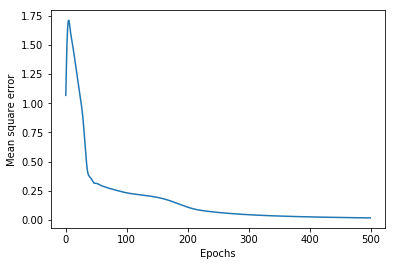

In [109]:
fig, ax = plt.subplots()
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean square error')

plt.xticks(np.arange(0, len(squared_errors)+1, 100))
plt.plot(range(len(squared_errors)), squared_errors)
plt.show()

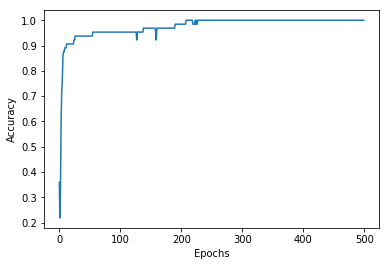

In [144]:
fig, ax = plt.subplots()
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

plt.xticks(np.arange(0, len(accuracies)+1, 100))
plt.plot(range(len(accuracies)), accuracies)
plt.show()

In [112]:
predictions = multi_layer_nn.predict_classes(samples)
print(predictions - samples)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


## 2 hidden layers

In [138]:
multi_layer_nn = multi_layer_neural_network()
squared_errors, accuracies = multi_layer_nn.fit(samples, samples, hidden_nodes=2, epochs=500, learning_rate=0.2, alpha=0.0)

[[ 2.48213148 -3.29160002  1.74992346 -1.65209299  1.13807843 -0.97848434
  -0.73112338 -0.77509381 -0.80821339]
 [-2.65652734 -1.03696216 -0.53874307  1.91325228  1.9767321   1.77962588
  -2.79817165 -0.99432658 -1.31815427]
 [ 0.82881559  0.47350633 -1.49102309  0.89177018  1.22687061 -2.00604073
  -1.72629628  3.63115693  0.84215248]]
[[ 4.52596168 -3.38763888  1.99546442 -5.71947604]
 [-6.68895551 -2.67297715  0.53910705 -5.55761519]
 [ 4.29206671  0.4089808  -3.61920938 -5.38915929]
 [-3.73658349  3.59277512  2.60264616 -4.90074485]
 [ 3.10416953  3.01679598  2.47753265 -4.43049292]
 [-0.6397804   3.95593713 -3.87509316 -5.50866674]
 [-0.90302637 -4.25551566 -3.67470992 -5.47713182]
 [-1.361457   -1.40713741  6.21962791 -4.73205763]]


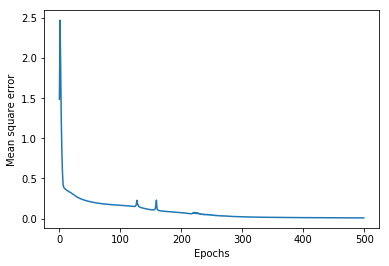

In [142]:
fig, ax = plt.subplots()
ax.set_xlabel('Epochs')
ax.set_ylabel('Mean square error')

plt.xticks(np.arange(0, len(squared_errors)+1, 100))
plt.plot(range(len(squared_errors)), squared_errors)
plt.show()

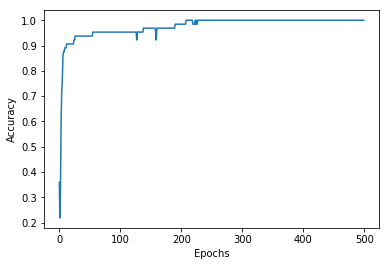

In [143]:
fig, ax = plt.subplots()
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')

plt.xticks(np.arange(0, len(accuracies)+1, 100))
plt.plot(range(len(accuracies)), accuracies)
plt.show()

In [141]:
predictions = multi_layer_nn.predict_classes(samples)
print(predictions - samples)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


Using batch learning, the network always converges if the stepsize is big enough.

The network represents a projection from the 8 dimensional space into the three dimensional space, and then back to 8 fimensional space. 

We need more epochs to train a network with two hidden layers to fit our data, or bigger step size.

Autoencoders seem really efficient for conpressing data, or can be useful for encrypting messages as well.